In [128]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [129]:
whale_csvpath = Path("../pandas-homework/homework-csvfiles/whale_returns.csv")
algo_csvpath = Path("../pandas-homework/homework-csvfiles/algo_returns.csv")
sp500_csvpath = Path("../pandas-homework/homework-csvfiles/sp500_history.csv")

In [130]:
whale_df = pd.read_csv(whale_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [131]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [132]:
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [133]:
algo_df = pd.read_csv(algo_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [134]:
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [135]:
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [136]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [137]:
sp500_df = pd.read_csv(sp500_csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [138]:
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float')

In [139]:
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [142]:
sp500_df_returns = sp500_df.pct_change()
sp500_df_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [144]:
sp500_df_returns.dropna(inplace=True)
sp500_df_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [150]:
sp500_df_returns.rename(columns={
    "Close":"S&P 500"
},inplace=True)
sp500_df_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [153]:
concat_df = pd.concat([whale_df, algo_df, sp500_df_returns ], axis="columns", join="inner")
concat_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


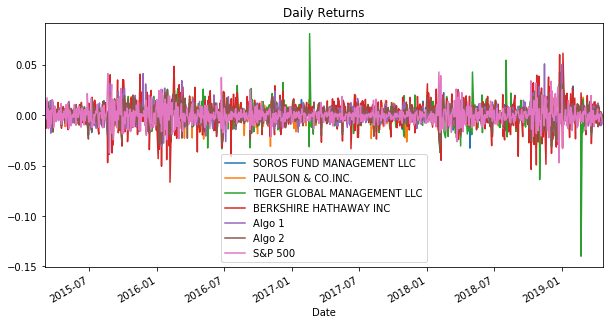

In [159]:
concat_df.plot(figsize=(10,5),title="Daily Returns")

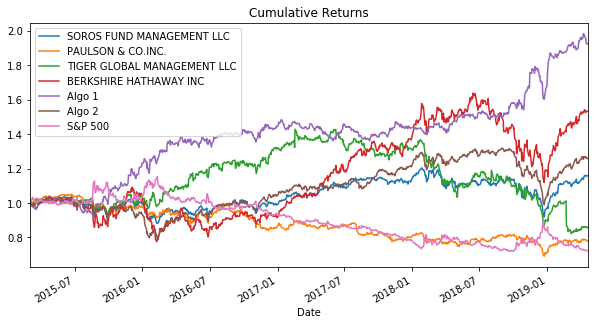

In [208]:
cumulative_returns = (1 + concat_df).cumprod()
cumulative_returns.plot(figsize=(10,5),title="Cumulative Returns")

In [210]:
#Subject to change
concat_df_2015 = concat_df.loc['2015-03-03':'2016-12-31']
D = len(concat_df_2015)
concat_df_2015_returns = concat_df_2015.add(1).prod()**(12/D)-1
concat_df_2015_returns

SOROS FUND MANAGEMENT LLC     -0.000260
PAULSON & CO.INC.             -0.003893
TIGER GLOBAL MANAGEMENT LLC    0.007078
BERKSHIRE HATHAWAY INC        -0.002268
Algo 1                         0.009516
Algo 2                         0.001027
S&P 500                       -0.001777
dtype: float64

In [221]:
#Needs retuning
returns_data_grp = concat_df.groupby([concat_df.index.year]).first()
returns_data_grp

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2016,-0.013263,-0.006037,-0.006017,-0.043190,-0.000307,-0.014485,-0.002008
2017,0.004301,0.015299,0.003969,0.008224,0.007381,0.009358,-0.005690
2018,0.014546,0.015045,-0.004784,0.031017,0.001254,0.017222,-0.006358
2019,0.006027,0.015429,0.007881,-0.001554,0.050342,0.018022,0.025385


In [238]:
#Analyze Returns****************************

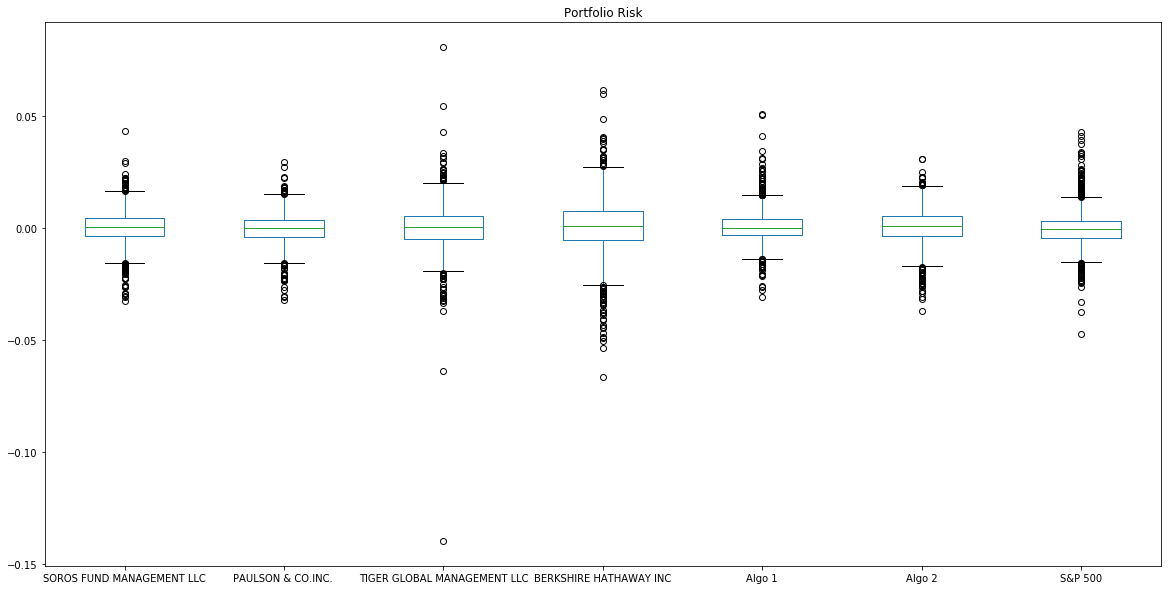

In [230]:
concat_df.plot.box(figsize=(20,10), title="Portfolio Risk")

In [235]:
daily_std = concat_df.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [ ]:
#Determine which stocks are riskier

In [237]:
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64